In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, random_state = 11)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [5]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30,activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([hidden2 ,input_wide])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(
    inputs = [input_wide , input_deep]
    , outputs = [output , output2]
)
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
model.compile(loss=keras.metrics.mean_squared_error,optimizer=keras.optimizers.SGD(0.01))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________

In [8]:
X_train_wide = X_train[:, :5]
X_train_deep = X_train[:, 2:]
X_val_wide = X_val[:, :5]
X_val_deep = X_val[:, 2:]
X_test_wide = X_test[:, :5]
X_test_deep = X_test[:, 2:]

In [10]:
history = model.fit(
    [X_train_wide,X_train_deep]
    ,[y_train,y_train]
    ,validation_data=(
        [X_val_wide,X_val_deep]
        ,[y_val,y_val]
    )
    ,epochs=50
    ,callbacks=callbacks
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 4s 305us/sample - loss: 2.6092 - dense_2_loss: 0.8651 - dense_3_loss: 1.7433 - val_loss: 1.2133 - val_dense_2_loss: 0.5108 - val_dense_3_loss: 0.7024
Epoch 2/50
11610/11610 [==============================] - 2s 138us/sample - loss: 0.9936 - dense_2_loss: 0.4113 - dense_3_loss: 0.5822 - val_loss: 0.9645 - val_dense_2_loss: 0.4038 - val_dense_3_loss: 0.5606
Epoch 3/50
11610/11610 [==============================] - 2s 135us/sample - loss: 0.9161 - dense_2_loss: 0.3877 - dense_3_loss: 0.5282 - val_loss: 0.9499 - val_dense_2_loss: 0.3972 - val_dense_3_loss: 0.5525
Epoch 4/50
11610/11610 [==============================] - 2s 138us/sample - loss: 0.8708 - dense_2_loss: 0.3780 - dense_3_loss: 0.4927 - val_loss: 0.8860 - val_dense_2_loss: 0.3861 - val_dense_3_loss: 0.4998
Epoch 5/50
11610/11610 [==============================] - 2s 133us/sample - loss: 0.8410 - dense_2_loss: 0.3729 - dense

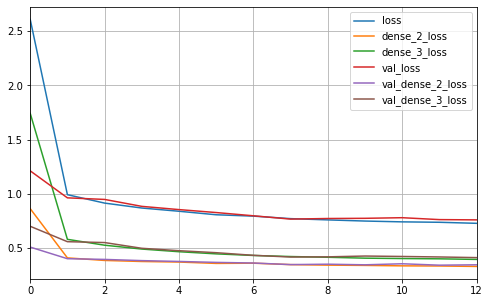

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.show()
plot_learning_curves(history)